In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('grayscale')
plt.rc('figure', facecolor='white', figsize=(14,4))

def read_csv(file):
    df = pd.read_csv(file)
    df = df.fillna(0)
    df['t'] = pd.to_datetime(df['t'], unit='s')
    df = df.set_index('t')
    return df

In [10]:
METRICS_PATH = '../metrics'

# Client Metrics

## Requests per second and request latency

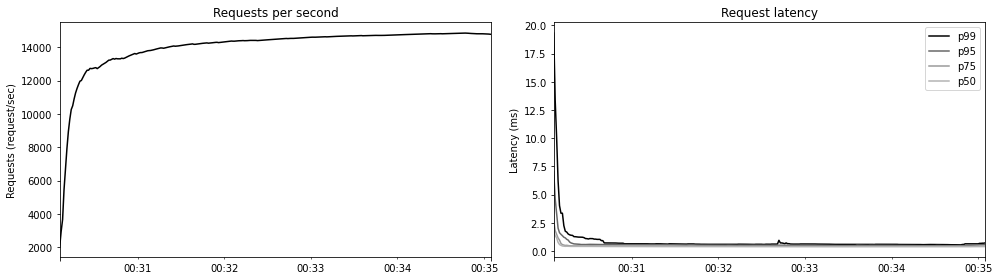

In [11]:
cli_requests = read_csv(METRICS_PATH + '/demo.dict.DictClient.requests.csv')
fig, (rps, lat) = plt.subplots(ncols=2)

ax = cli_requests.plot(title='Requests per second', y='mean_rate', legend=False, ax=rps)
ax.set_ylabel('Requests (request/sec)')
ax.set_xlabel(None)

ax = cli_requests.plot(title='Request latency', y=['p99', 'p95', 'p75', 'p50'], ax=lat)
ax.set_ylabel('Latency (ms)')
ax.set_xlabel(None)

plt.tight_layout()

# Server Metrics

## Requests and commands per second

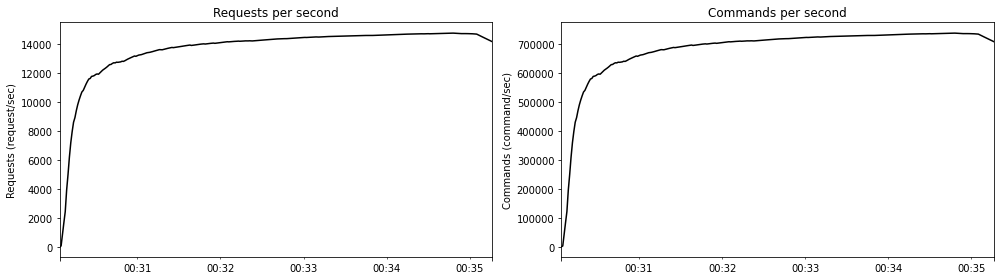

In [12]:
rps = read_csv(METRICS_PATH + '/parallelism.late.CBASEServiceReplica.requests.csv')
cps = read_csv(METRICS_PATH + '/parallelism.late.CBASEServiceReplica.commands.csv')
fig, (prps, pcps) = plt.subplots(ncols=2)

ax = rps.plot(title='Requests per second', y='mean_rate', legend=False, ax=prps)
ax.set_ylabel('Requests (request/sec)')
ax.set_xlabel(None)

ax = cps.plot(title='Commands per second', y='mean_rate', legend=False, ax=pcps)
ax.set_ylabel('Commands (command/sec)')
ax.set_xlabel(None)

plt.tight_layout()

## Graph state and conflict percentage

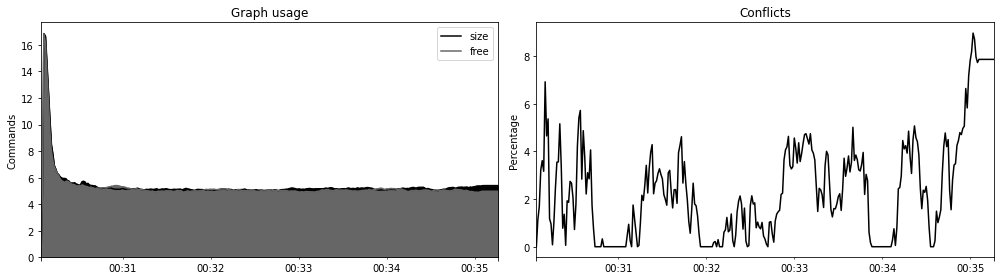

In [13]:
graph_size = read_csv(METRICS_PATH + '/parallelism.late.graph.COS.size.csv')
graph_free = read_csv(METRICS_PATH + '/parallelism.late.graph.COS.free.csv')
conflicts = read_csv(METRICS_PATH + '/parallelism.late.graph.COS.conflict.csv')
conflicts['value'] = conflicts['value'] * 100

fig, (gph, cft) = plt.subplots(ncols=2)
ax = conflicts.plot(title='Conflicts', legend=False, ax=cft)
ax.set_ylabel('Percentage')
ax.set_xlabel(None)

graph_size.plot.area(y='mean', title="Graph usage", ax=gph)
graph_free.plot.area(y='mean', ax=gph)
gph.set_ylabel('Commands')
gph.set_xlabel(None)
gph.legend(['size', 'free'])

plt.tight_layout()